# Decision Tree Classification

A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.<br/><br/>
Decision Tree consists of : <br/><br/>
Nodes : Test for the value of a certain attribute.<br/><br/>
Edges/ Branch : Correspond to the outcome of a test and connect to the next node or leaf.<br/><br/>
Leaf nodes : Terminal nodes that predict the outcome (represent class labels or class distribution).<br/><br/>
For Classification Problem the outcome is  Categorical/ discrete.


# Problem:
Conversion Rate is calculated based on EmailSent, Open Rate, Click Rate

In [1]:
pwd

'C:\\Users\\User\\Git-Hup Files\\Machine Learning Classification'

In [2]:
cd C:\Users\User\Desktop\Anindita Mitra\Machine Learning\Email Marketing

C:\Users\User\Desktop\Anindita Mitra\Machine Learning\Email Marketing


In [3]:
#Import all the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import Data set from the local directory

df = pd.read_csv("EmailClassification.csv")

In [5]:
df.head(10)

,Email_ID,Month,Email_Sent,Open_Rate,Click_Rate,Conversion_Rate
0,EMA00081000168000,Jan,873,42,14,0
1,EMA00081000187610,Feb,630,32,26,1
2,EMA00081000244770,Mar,988,21,8,0
3,EMA00081000245260,Apr,339,25,9,0
4,EMA00081000264690,May,1157,30,31,1
5,EMA00081000337110,Jun,1157,25,31,1
6,EMA00081000390580,Jul,962,78,27,0
7,EMA00081000445960,Jan,578,17,11,0
8,EMA00081000581770,Feb,1173,33,21,1
9,EMA00081000587870,Mar,1173,23,2,0


In [6]:
#defining X and Y
x = df.iloc[:,2:-1]
y= df.iloc[:, -1]

In [7]:
x.head(10)

,Email_Sent,Open_Rate,Click_Rate
0,873,42,14
1,630,32,26
2,988,21,8
3,339,25,9
4,1157,30,31
5,1157,25,31
6,962,78,27
7,578,17,11
8,1173,33,21
9,1173,23,2


In [8]:
# Splitting data into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x , y, test_size=0.2, random_state=0)

In [9]:
# Training Dec Tree
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(criterion='entropy',random_state = 0)
Classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [10]:
#prediction on random sample
Classifier.predict([[1579,823,456]])

array([0], dtype=int64)

In [11]:
y_pred = Classifier.predict(x_test)

In [12]:
# No of correct and incorrect prdection
from sklearn.metrics import confusion_matrix, accuracy_score

[[26  4]
 [ 4  6]]


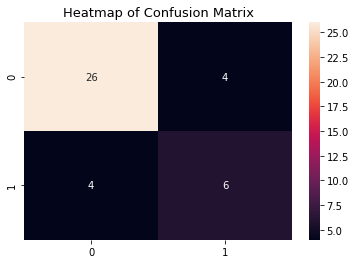

In [13]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.title('Heatmap of Confusion Matrix', fontsize=13)
sns.heatmap(cm, annot=True)
plt.show()


In [14]:
#Prediction and Evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.60      0.60      0.60        10

    accuracy                           0.80        40
   macro avg       0.73      0.73      0.73        40
weighted avg       0.80      0.80      0.80        40



In [15]:
#Accuracy
accuracy_score(y_test, y_pred) 

0.8

In [16]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = 10)
print("accuracies: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

accuracies: 89.96 %
Standard Deviation: 7.48 %
